In [1]:
import requests
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

# Get the data from CryptoAPI

In [2]:
res = requests.get("https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol=BTC&market=ILS&apikey=$demo")
data = res.json()
dict_data = data['Time Series (Digital Currency Daily)']

## Working with float as type and Date as type + dropping other columns


In [3]:
features_df = pd.DataFrame.from_dict(dict_data,orient='index')
features_df = features_df[features_df.columns.drop(list(features_df.filter(regex='ILS')))]

features_df.index.name = 'Date'
features_df = features_df.reset_index()
features_df.style.format({"date": lambda t: t.strftime("%d-%m-%Y")}) 
features_df["4b. close (USD)"] = features_df["4b. close (USD)"].astype(float).round(2)
features_df = features_df.rename(columns = {'4b. close (USD)': 'Close'})
features_df =  features_df[::-1].reset_index()
features_df = features_df.drop(columns = ['index','1b. open (USD)', '2b. high (USD)','5. volume','6. market cap (USD)','3b. low (USD)'])

# features_df = features_df.drop(features_df.index[300:1000])


In [4]:
features_df.head()

,Date,Close
0,2018-09-28,6634.58
1,2018-09-29,6596.38
2,2018-09-30,6626.57
3,2018-10-01,6611.61
4,2018-10-02,6525.79


In [5]:
features_df.tail()

,Date,Close
995,2021-06-19,35483.72
996,2021-06-20,35600.16
997,2021-06-21,31608.93
998,2021-06-22,32509.56
999,2021-06-23,32564.37


# Lets look on the past 100 days

### Trayding days

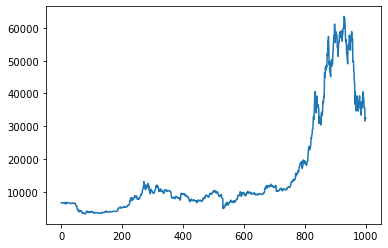

In [6]:

features_df.head()
plt.plot(features_df.head(1000)['Close'])
plt.show()

In [7]:
df = features_df['Close']
df.head()

0    6634.58
1    6596.38
2    6626.57
3    6611.61
4    6525.79
Name: Close, dtype: float64

## Predict n days into the future

In [8]:
future_days = 30

## Create new column (target) shifted n days

In [9]:
features_df['Prediction'] = features_df[['Close']].shift(-future_days)
features_df.head(32)

,Date,Close,Prediction
0,2018-09-28,6634.58,6489.93
1,2018-09-29,6596.38,6344.50
2,2018-09-30,6626.57,6330.87
3,2018-10-01,6611.61,6371.93
4,2018-10-02,6525.79,6410.00
5,2018-10-03,6510.00,6433.98
6,2018-10-04,6593.79,6387.09
7,2018-10-05,6635.65,6485.85
8,2018-10-06,6594.27,6468.99
9,2018-10-07,6615.26,6519.11


In [10]:
features_df.tail()

,Date,Close,Prediction
995,2021-06-19,35483.72,NaN
996,2021-06-20,35600.16,NaN
997,2021-06-21,31608.93,NaN
998,2021-06-22,32509.56,NaN
999,2021-06-23,32564.37,NaN


## Let's split the data to X & y

In [11]:
X = np.array(features_df.drop(['Prediction','Date'],1))[:-future_days]
print(X)

[[ 6634.58]
 [ 6596.38]
 [ 6626.57]
 [ 6611.61]
 [ 6525.79]
 [ 6510.  ]
 [ 6593.79]
 [ 6635.65]
 [ 6594.27]
 [ 6615.26]
 [ 6673.01]
 [ 6656.61]
 [ 6631.  ]
 [ 6252.68]
 [ 6298.01]
 [ 6332.93]
 [ 6339.34]
 [ 6752.5 ]
 [ 6759.27]
 [ 6740.89]
 [ 6618.96]
 [ 6528.88]
 [ 6588.4 ]
 [ 6590.11]
 [ 6581.2 ]
 [ 6553.51]
 [ 6565.5 ]
 [ 6528.09]
 [ 6538.63]
 [ 6505.6 ]
 [ 6489.93]
 [ 6344.5 ]
 [ 6330.87]
 [ 6371.93]
 [ 6410.  ]
 [ 6433.98]
 [ 6387.09]
 [ 6485.85]
 [ 6468.99]
 [ 6519.11]
 [ 6578.46]
 [ 6479.84]
 [ 6419.99]
 [ 6433.05]
 [ 6449.81]
 [ 6453.07]
 [ 6457.66]
 [ 5922.41]
 [ 5753.4 ]
 [ 5655.94]
 [ 5628.29]
 [ 5662.  ]
 [ 4910.03]
 [ 4558.86]
 [ 4661.07]
 [ 4370.  ]
 [ 4420.61]
 [ 3932.44]
 [ 4085.78]
 [ 3862.2 ]
 [ 3875.21]
 [ 4264.85]
 [ 4295.84]
 [ 4041.32]
 [ 4190.02]
 [ 4161.01]
 [ 3884.01]
 [ 3951.64]
 [ 3769.84]
 [ 3508.75]
 [ 3403.55]
 [ 3410.93]
 [ 3545.37]
 [ 3432.88]
 [ 3380.39]
 [ 3445.  ]
 [ 3302.06]
 [ 3224.17]
 [ 3211.72]
 [ 3228.67]
 [ 3509.08]
 [ 3652.98]
 [ 3662.22]
 [ 4

In [12]:
y = np.array(features_df['Prediction'])[:-future_days]
print(y)

[ 6489.93  6344.5   6330.87  6371.93  6410.    6433.98  6387.09  6485.85
  6468.99  6519.11  6578.46  6479.84  6419.99  6433.05  6449.81  6453.07
  6457.66  5922.41  5753.4   5655.94  5628.29  5662.    4910.03  4558.86
  4661.07  4370.    4420.61  3932.44  4085.78  3862.2   3875.21  4264.85
  4295.84  4041.32  4190.02  4161.01  3884.01  3951.64  3769.84  3508.75
  3403.55  3410.93  3545.37  3432.88  3380.39  3445.    3302.06  3224.17
  3211.72  3228.67  3509.08  3652.98  3662.22  4049.62  3838.66  3948.91
  3929.71  4008.01  3745.79  3777.74  3567.91  3839.26  3695.32  3801.91
  3702.9   3797.14  3858.56  3766.78  3792.01  3770.96  3987.6   3975.45
  3955.13  3966.65  3585.88  3601.31  3583.13  3476.81  3626.09  3553.06
  3591.84  3616.21  3594.87  3665.3   3539.28  3526.9   3570.93  3552.82
  3569.62  3565.29  3565.25  3550.84  3434.15  3411.04  3458.18  3434.1
  3462.07  3504.77  3458.11  3463.22  3471.59  3405.37  3398.4   3659.04
  3665.18  3680.06  3631.05  3631.46  3609.4   3590.

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

## Let's create our models

In [14]:
models = {"LinearRegression": LinearRegression(), "DecisionTreeRegressor": DecisionTreeRegressor()}

def model_iteration(models, X_train,X_test,y_train,y_test):
    np.random.seed(42)
    model_scores = {}
    for model,model_exec in models.items():
        model_exec.fit(X_train,y_train)
        model_scores[model] = model_exec.score(X_test,y_test)
    return model_scores
# tree = DecisionTreeRegressor().fit(X_train,y_train)
# lr = LinearRegression().fit(X_train,y_train)


In [15]:
model_score = model_iteration(models,X_train,X_test,y_train,y_test)
model_score



{'LinearRegression': 0.8822943156450203,
 'DecisionTreeRegressor': 0.8758763718877249}

(array([0, 1]),
 [Text(0, 0, 'LinearRegression'), Text(1, 0, 'DecisionTreeRegressor')])

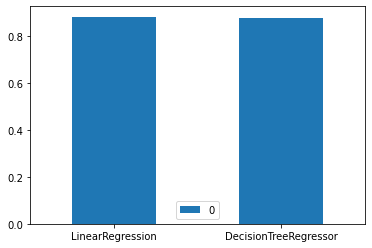

In [16]:
model_score_df = pd.DataFrame.from_dict(model_score,orient='index')
model_score_df.plot.bar()
plt.xticks(rotation=0)

## Create the prediction rows and compare by model

In [17]:
x_future = features_df.drop(['Prediction','Date'],1)[:-future_days]
x_future = x_future.tail(future_days)
x_future
x_future = np.array(x_future)


# Predction Function

In [18]:
def predict_by_model(model,X_train,y_train,x_future):
    np.random.seed(42)
    models = {"LinearRegression": LinearRegression(), "DecisionTreeRegressor": DecisionTreeRegressor()}
    valid = features_df[X.shape[0]:]
    models[model].fit(X_train,y_train)
    predictions = models[model].predict(x_future)
    valid['Prediction'] = predictions
    plt.figure(figsize=(16,8))
    plt.title('Model')
    plt.xlabel('Days')
    plt.ylabel('Close price USD')
    plt.plot(features_df['Close'])
    plt.plot(valid[['Close','Prediction']])
    plt.legend(['Original','Value','Prediction'])
    plt.show()


# LinearRegression

<ipython-input-18-568e58b41b3e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = predictions


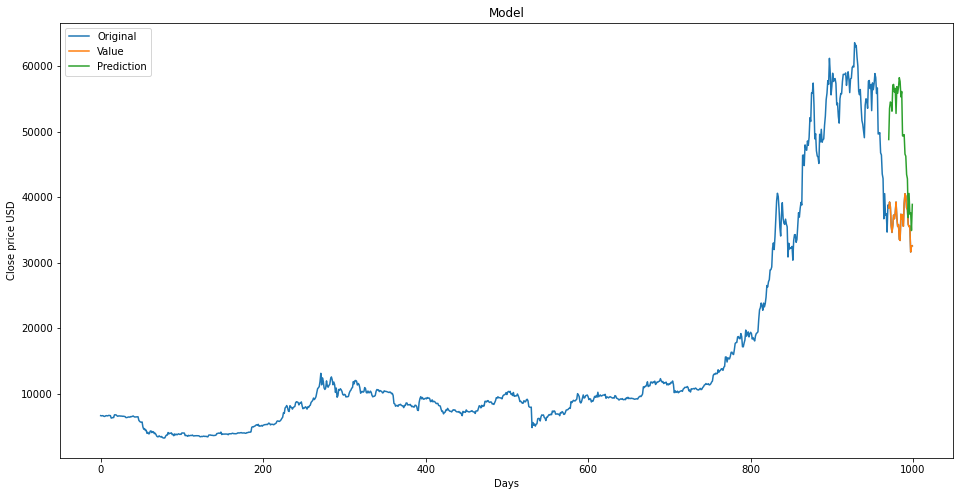

In [19]:
predict_by_model('LinearRegression',X_train,y_train,x_future)

# Let's try to do the same with DecisionTreeRegressor

<ipython-input-18-568e58b41b3e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = predictions


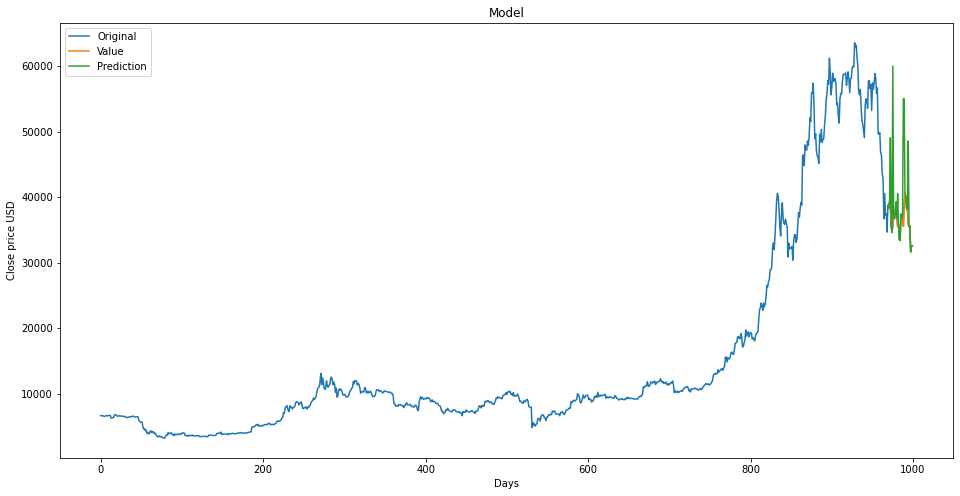

In [20]:
predict_by_model('DecisionTreeRegressor',X_train,y_train,x_future)

## Let's now use the DecisionTreeRegressor to predict the next 30 days!

In [25]:
x_future_prediction = features_df.drop(['Prediction','Date'],1)[future_days:]
x_future_prediction = x_future_prediction.tail(future_days)
x_future_prediction = np.array(x_future_prediction)
x_future_prediction

array([[38324.72],
       [39241.91],
       [38529.98],
       [35663.49],
       [34605.15],
       [35641.27],
       [37253.81],
       [36693.09],
       [37568.68],
       [39246.79],
       [36829.  ],
       [35513.2 ],
       [35796.31],
       [33552.79],
       [33380.81],
       [37388.05],
       [36675.72],
       [37331.98],
       [35546.11],
       [39020.57],
       [40516.29],
       [40144.04],
       [38349.01],
       [38092.97],
       [35819.84],
       [35483.72],
       [35600.16],
       [31608.93],
       [32509.56],
       [32564.37]])

## Let's use the DecisionTree model for our prediction

In [26]:
from datetime import datetime
np.random.seed(42)
tree = DecisionTreeRegressor()
tree.fit(X_train,y_train)
prediction = tree.predict(x_future_prediction)
prediction

array([50971.75, 52375.17, 50971.75, 49133.45, 32509.56, 55906.  ,
       35600.16, 48577.79, 48751.71, 52375.17, 48577.79, 55906.  ,
       49133.45, 48440.65, 48440.65, 47287.6 , 48577.79, 47287.6 ,
       55906.  , 52375.17, 35483.72, 46374.87, 50971.75, 46420.42,
       49133.45, 55906.  , 55906.  , 37618.87, 48891.  , 48891.  ])

In [27]:

new_df = features_df[X.shape[0]:]
date = features_df['Date'][features_df.index[-1]]
new_df = pd.DatetimeIndex(new_df['Date']) + pd.DateOffset(30)
new_df = pd.DataFrame(new_df)
new_df['Prediction'] = prediction

new_df


,Date,Prediction
0,2021-06-24,50971.75
1,2021-06-25,52375.17
2,2021-06-26,50971.75
3,2021-06-27,49133.45
4,2021-06-28,32509.56
5,2021-06-29,55906.00
6,2021-06-30,35600.16
7,2021-07-01,48577.79
8,2021-07-02,48751.71
9,2021-07-03,52375.17


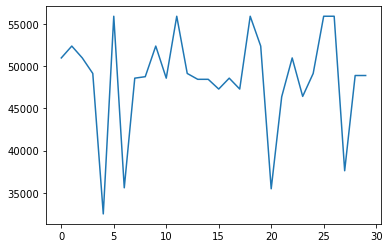

In [28]:
plt.plot(new_df['Prediction'])
plt.show()